Import libraries.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


### Import the Fashion MNIST dataset

The Fashion MNIST dataset contains 70 000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

After importing, the images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the 'class' of clothing the image represents:
- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:
- The train_images and train_labels arrays are the training set - the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

Let's display the first 25 images from the training set and display the class name below each image.

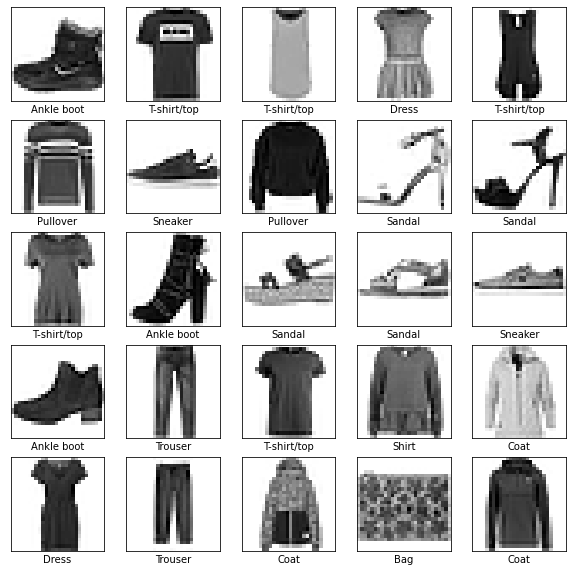

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Preprocess the data

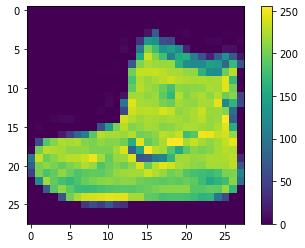

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As you see, the pixel values fall in the range of 0 to 255.
To improve machine learning process, I will scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Build the model
Set up the layers.

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compile the model


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

- Loss function - This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer - This is how the model is updated based on the data it sees and its loss function.
- Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

### Train the model

Feed the model.

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2244 - accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2192 - accuracy: 0.9183
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2127 - accuracy: 0.9196
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2054 - accuracy: 0.9224
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2002 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1940 - accuracy: 0.9269
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1896 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1834 - accuracy: 0.9308
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.180

Evaluate accuracy.

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3622 - accuracy: 0.8874

Test accuracy: 0.8873999714851379


Make predictions.

In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
i = np.random.randint(len(test_labels))
np.argmax(predictions[i])

5

In [22]:
test_labels[i]

5

Verify predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

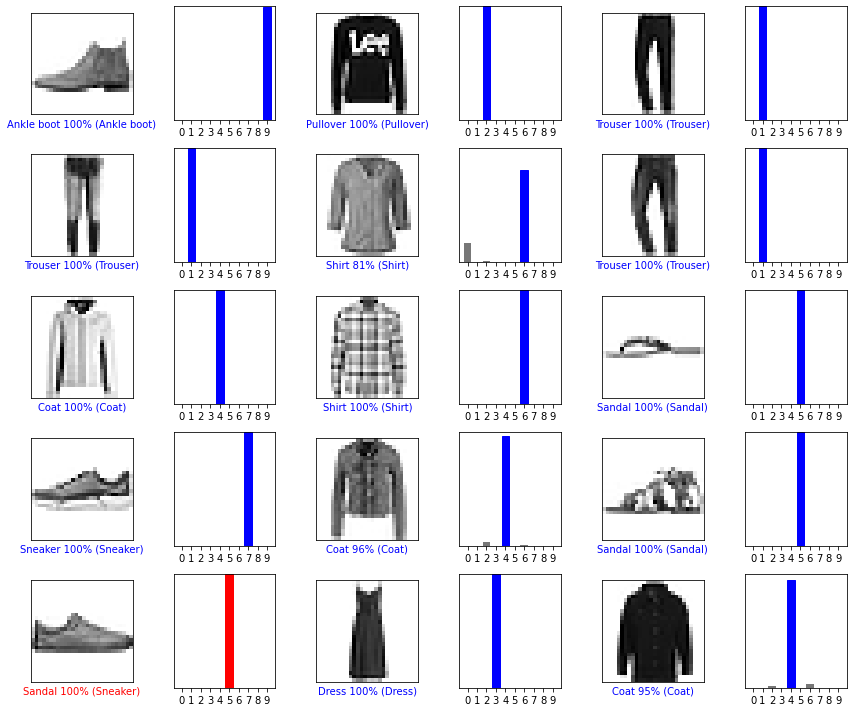

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

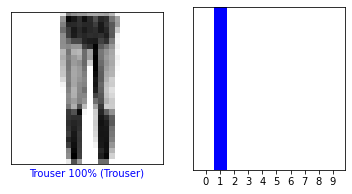

In [27]:
i = np.random.randint(num_images)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Use the trained model

[[2.6979749e-05 2.1652896e-08 3.2015767e-02 2.6895192e-08 9.6080500e-01
  3.9919099e-11 7.1521760e-03 8.6230258e-15 1.3674059e-08 3.0330916e-12]]
Predicted class: 4
True class: 4


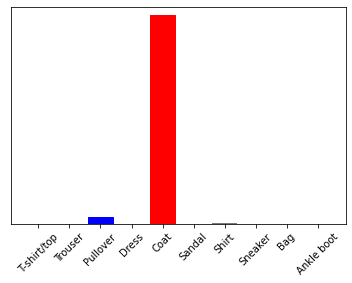

In [28]:
i = np.random.randint(num_images)
img = test_images[i]
img = np.expand_dims(img,0)
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print('Predicted class: {}'.format(np.argmax(predictions_single[0])))
print('True class: {}'.format(test_labels[i]))